# GRIP : The Sparks Foundation

## Data Science and Business Analytics Intern

## Task 3: Exploratory Data Analysis - Retail

### In this task we have to 

### Data Source : https://bit.ly/3i4rbWl

### Demonstrated and Performed by : Sarika Chaturvedi | sarikachaturvedi236@gmail.com

In [44]:
# importing necessary Libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [45]:
!pip install -U seaborn --quiet 

## Reading The Dataset

In [46]:
#loading data
data = pd.read_csv(r"C:\Users\HP\Desktop\Numpy and pandas datasets\project datasets\SampleSuperstore.csv")

In [47]:
#first five rows
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [48]:
# last five rows
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


## Understanding The data

In [49]:
data.shape

(9994, 13)

In [50]:
# statistical overview of the data
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [51]:
# columns inside the dataset
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [52]:
# overall info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


### Checking for the duplicate data. If Yes, then dropping those data.

In [53]:
print(data.isnull().sum(), '\n\nNumber of duplicate rows: ', data.duplicated().sum())  #check for nulls and duplicates

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64 

Number of duplicate rows:  17


In [54]:
#drop the duplicate rows

data.drop_duplicates(inplace=True)

data.shape[0]

9977

In [55]:
data.shape

(9977, 13)

In [56]:
data.nunique() #Displays the unique data row

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Dropping irrelevant columns

In [57]:
#Deleting the column
data.drop('Postal Code',axis=1,inplace=True)


In [58]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [42]:
data['Country'].value_counts()

United States    9977
Name: Country, dtype: int64

In [35]:
#Calculating Cost 
data['Cost']=data['Sales']-data['Profit']

#Calculating Profit%
data['Profit%']=(data['Profit']/data['Cost'])*100

In [59]:
data.head()

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Multivariate Visualizations

In [60]:
#correlation matrix
datacorr = data.corr()
datacorr

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


Text(0.5, 1, 'Correlation between variables')

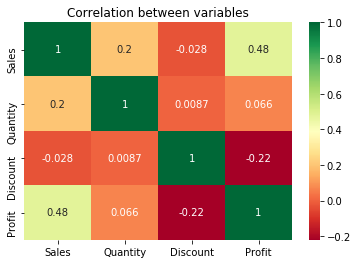

In [61]:
#heatmap for correlation matrix
sns.heatmap(datacorr, annot=True, cmap='RdYlGn')
plt.title('Correlation between variables')

## Finding modes of shipping products and observing which is more preferred mode of shipping?

In [62]:
shipmodetypes = data.groupby('Ship Mode')
for i,df in shipmodetypes:
    print(i)

First Class
Same Day
Second Class
Standard Class


In [63]:
data.groupby('Ship Mode').groups

{'First Class': Int64Index([  35,   36,   44,   45,   55,   56,   57,   58,   59,   60,
             ...
             9913, 9923, 9924, 9925, 9926, 9927, 9933, 9961, 9962, 9981],
            dtype='int64', length=1537),
 'Same Day': Int64Index([ 366,  367,  368,  369,  657,  658,  664,  683,  684,  746,
             ...
             9718, 9745, 9746, 9772, 9786, 9871, 9872, 9928, 9929, 9963],
            dtype='int64', length=542),
 'Second Class': Int64Index([   0,    1,    2,   17,   18,   19,   20,   23,   25,   26,
             ...
             9953, 9954, 9955, 9960, 9964, 9965, 9966, 9980, 9989, 9993],
            dtype='int64', length=1943),
 'Standard Class': Int64Index([   3,    4,    5,    6,    7,    8,    9,   10,   11,   12,
             ...
             9982, 9983, 9984, 9985, 9986, 9987, 9988, 9990, 9991, 9992],
            dtype='int64', length=5955)}

In [64]:
data['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

Text(0.5, 1.0, 'Ship Mode Preference')

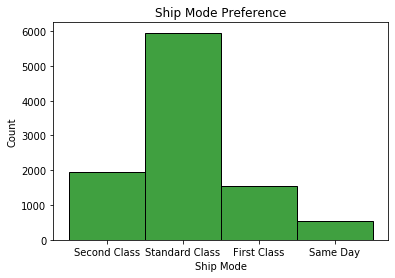

In [65]:
sns.histplot(x=data['Ship Mode'], color='g')
plt.title('Ship Mode Preference')

## Customer Segments

In [66]:
segmenttypes = data.groupby('Segment')
for i,df in segmenttypes:
    print(i)

Consumer
Corporate
Home Office


In [67]:
data['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

Text(0.5, 1.0, 'Customer Segments')

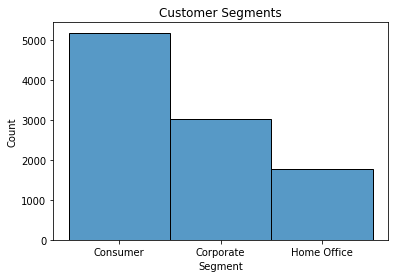

In [68]:
sns.histplot(x=data['Segment'])
plt.title('Customer Segments')

## Category-wise Analysis

In [69]:
category = data.groupby('Category')
for i,df in category:
    print(i)

Furniture
Office Supplies
Technology


Text(0.5, 1.0, 'Categories of Products')

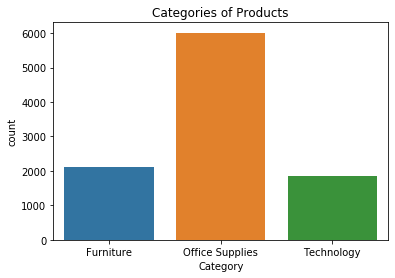

In [70]:
sns.countplot(x=data['Category'])
plt.title('Categories of Products')

Text(0.5, 1.0, 'Region-wise Ordered Product Categories')

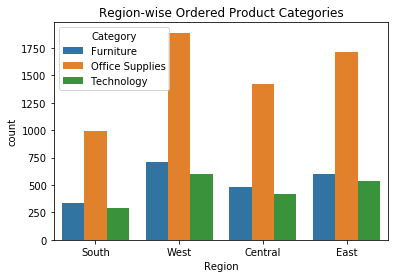

In [71]:
sns.countplot(x=data['Region'], hue=data['Category'])
plt.title('Region-wise Ordered Product Categories')

#### South region of the US orders less technology products and more office supplies, west orders more than any other region

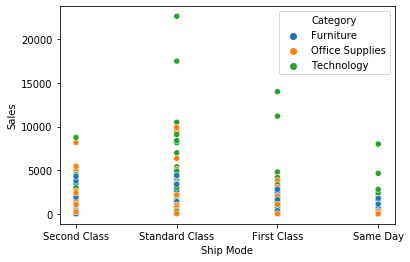

In [72]:
sns.scatterplot(x=data['Ship Mode'], y=data['Sales'], hue=data['Category'])

                      Profit        Sales
Category                                 
Furniture         18421.8137  741306.3133
Office Supplies  122364.6608  718735.2440
Technology       145454.9481  836154.0330


Text(0.5, 1.0, 'Category-wise Profit and Sale')

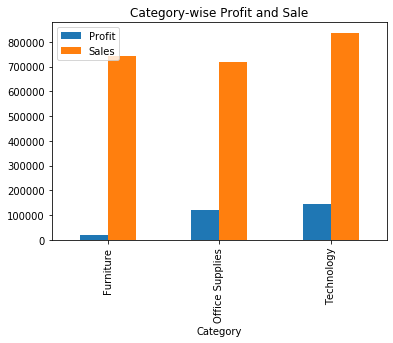

In [73]:
ds =data.groupby('Category')['Profit','Sales'].agg('sum')
print(ds)
ds.plot.bar()
plt.legend(loc='upper left')
plt.title('Category-wise Profit and Sale')

## Sub-Category-wise Analysis

In [74]:
subcatarr = []
subcat = data.groupby('Sub-Category')
for i,df in subcat:
    print(i)
    subcatarr.append(i)

Accessories
Appliances
Art
Binders
Bookcases
Chairs
Copiers
Envelopes
Fasteners
Furnishings
Labels
Machines
Paper
Phones
Storage
Supplies
Tables


Text(0.5, 1.0, 'Quantity of different Sub-Categories Ordered')

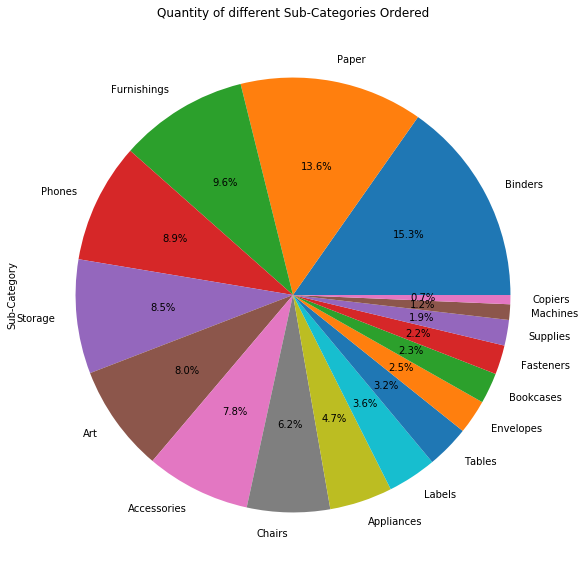

In [75]:
plt.figure(figsize=(10,10))
data['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Quantity of different Sub-Categories Ordered')

## Region-wise Analysis

In [76]:
regions = data.groupby('Region')
for i,df in regions:
    print(i)

Central
East
South
West


Text(0.5, 1.0, 'Region-wise Profit and Sales')

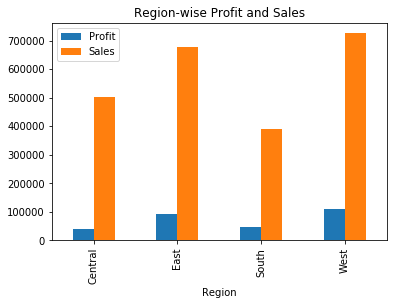

In [77]:
rw =data.groupby('Region')['Profit','Sales'].agg('sum')
rw.plot.bar()
plt.legend(loc='upper left')
plt.title('Region-wise Profit and Sales')

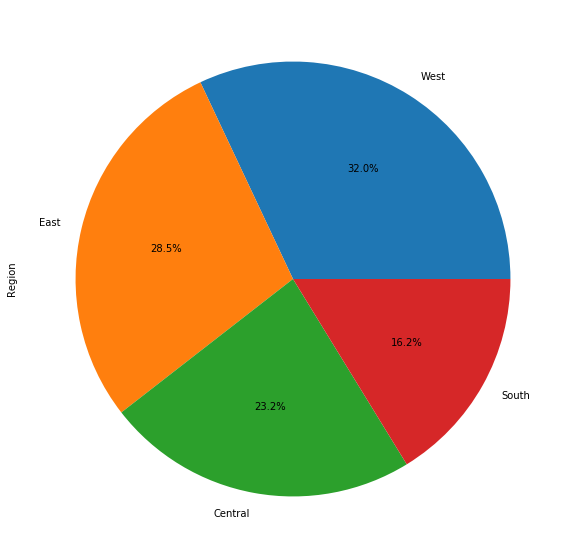

In [78]:
plt.figure(figsize=(10,10))
data['Region'].value_counts().plot.pie(autopct="%1.1f%%")

## City-wise Analysis

In [79]:
city = []
cities = data.groupby('City')
for i,df in cities:
    city.append(i)

In [80]:
city

['Aberdeen',
 'Abilene',
 'Akron',
 'Albuquerque',
 'Alexandria',
 'Allen',
 'Allentown',
 'Altoona',
 'Amarillo',
 'Anaheim',
 'Andover',
 'Ann Arbor',
 'Antioch',
 'Apopka',
 'Apple Valley',
 'Appleton',
 'Arlington',
 'Arlington Heights',
 'Arvada',
 'Asheville',
 'Athens',
 'Atlanta',
 'Atlantic City',
 'Auburn',
 'Aurora',
 'Austin',
 'Avondale',
 'Bakersfield',
 'Baltimore',
 'Bangor',
 'Bartlett',
 'Bayonne',
 'Baytown',
 'Beaumont',
 'Bedford',
 'Belleville',
 'Bellevue',
 'Bellingham',
 'Bethlehem',
 'Beverly',
 'Billings',
 'Bloomington',
 'Boca Raton',
 'Boise',
 'Bolingbrook',
 'Bossier City',
 'Bowling Green',
 'Boynton Beach',
 'Bozeman',
 'Brentwood',
 'Bridgeton',
 'Bristol',
 'Broken Arrow',
 'Broomfield',
 'Brownsville',
 'Bryan',
 'Buffalo',
 'Buffalo Grove',
 'Bullhead City',
 'Burbank',
 'Burlington',
 'Caldwell',
 'Camarillo',
 'Cambridge',
 'Canton',
 'Carlsbad',
 'Carol Stream',
 'Carrollton',
 'Cary',
 'Cedar Hill',
 'Cedar Rapids',
 'Champaign',
 'Chandler',
 

In [81]:
len(city)

531

In [82]:
data['City'].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Atlantic City      1
Cheyenne           1
Goldsboro          1
Conway             1
Antioch            1
Name: City, Length: 531, dtype: int64

In [83]:
data['City'].value_counts().min()

1

In [84]:
data['City'].value_counts().max()

914

In [85]:
data[data['City']=='New York City']

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
53,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Fasteners,15.260,7,0.0,6.2566
54,Standard Class,Corporate,United States,New York City,New York,East,Technology,Phones,1029.950,5,0.0,298.6855
70,Standard Class,Consumer,United States,New York City,New York,East,Office Supplies,Binders,4.616,1,0.2,1.7310
96,Second Class,Home Office,United States,New York City,New York,East,Furniture,Furnishings,96.530,7,0.0,40.5426
110,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Furnishings,41.960,2,0.0,10.9096
...,...,...,...,...,...,...,...,...,...,...,...,...
9926,First Class,Corporate,United States,New York City,New York,East,Technology,Phones,199.980,2,0.0,53.9946
9927,First Class,Corporate,United States,New York City,New York,East,Office Supplies,Storage,83.920,4,0.0,20.1408
9938,Standard Class,Corporate,United States,New York City,New York,East,Furniture,Furnishings,60.350,5,0.0,19.9155
9939,Standard Class,Corporate,United States,New York City,New York,East,Office Supplies,Supplies,35.520,4,0.0,9.9456


### The Insights from above visvualization are West part  has the potential customers so we can target them more and the South part has least customers so we can make a good campaign there to attract more customers and technology products are gaining us more profit and office supplies has highest sale , we can make our decisions accordingly by taking the results of this EDA into consideration. 

# Thank You